### IMORTACIÓN DE PAQUETES

In [1]:
!pip install yfinance

In [2]:
!pip install arch

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 

from arch import arch_model
from math import sqrt
import seaborn as sns

import yfinance
import warnings
warnings.filterwarnings("ignore")

sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### DATA

In [4]:
data = yfinance.download (tickers = "^GSPC ^FTSE ^N225 ^GDAXI", start = "1994-01-07", end = "2021-05-31", 
                              interval = "1d", group_by = 'ticker', auto_adjust = True, treads = True)
df = data.copy()

[*********************100%***********************]  4 of 4 completed


In [5]:
df['spx'] = df['^GSPC'].Close[:]
df['dax'] = df['^GDAXI'].Close[:]
df['ftse'] = df['^FTSE'].Close[:]
df['nikkei'] = df['^N225'].Close[:]
del df['^N225']
del df['^GSPC']
del df['^GDAXI']
del df['^FTSE']
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [6]:
df['market_value']=df.ftse

In [7]:
size = int(len(df)*0.8)
df, df_test = df.iloc[:size], df.iloc[size:]

### RETORNOS

In [9]:
df['ret'] = df.market_value.pct_change(1)*100

### VOLATILIDAD

In [15]:
df['sq_ret'] = df.ret.mul(df.ret)

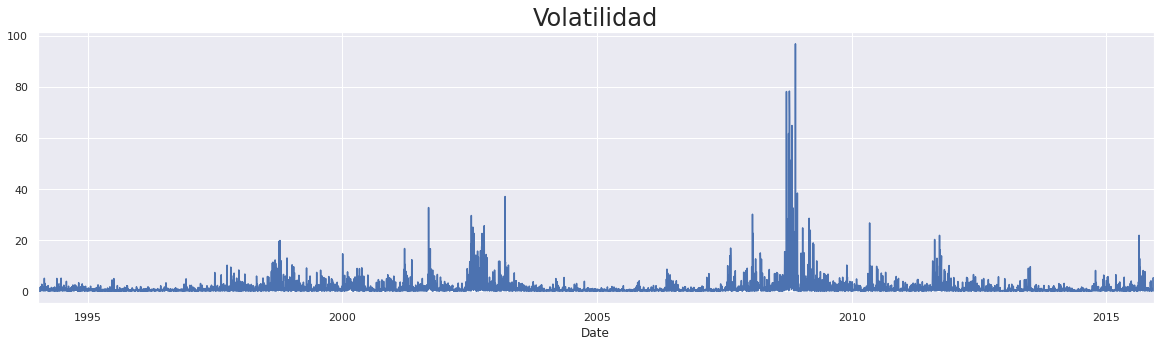

In [16]:
df.sq_ret.plot(figsize=(20,5))
plt.title("Volatilidad", size = 24)
plt.show()

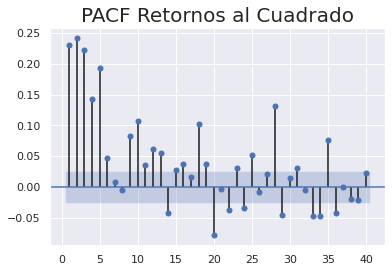

In [17]:
sgt.plot_pacf(df.sq_ret[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF Retornos al Cuadrado", size = 20)
plt.show()

### MODELO GARCH 

In [20]:
model_garch_1_1 = arch_model(df.ret[1:], mean = "Constant", vol = "GARCH", p = 1, q = 1)
results_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 7800.089020594461
Iteration:     10,   Func. Count:     74,   Neg. LLF: 7797.459223378469
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7797.459066479225
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7797.46
Distribution:                  Normal   AIC:                           15602.9
Method:            Maximum Likelihood   BIC:                           15629.5
                                        No. Observations:                 5716
Date:                Thu, Jun 10 2021   Df Residuals:                     5715
Time:                        05:23:36   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0419  1.098e-02      3.813  1.371e-04 [2.034e-02,6.336e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0120  3.144e-03      3.826  1.300e-04 [5.868e-03,1.819e-02]
alpha[1]       0.0868  1.128e-02      7.697  1.388e-14   [6.471e-02,  0.109]
beta[1]        0.9042  1.236e-02     73.181      0.000     [  0.880,  0.928]
============================================================================

Covariance estimator: robust
"""

### MODELOS GARCH DE ORDEN SUPERIOR (Higher-Lag)

In [19]:
model_garch_1_2 = arch_model(df.ret[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 2)
results_garch_1_2 = model_garch_1_2.fit(update_freq = 5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 7805.922244673634
Iteration:     10,   Func. Count:     79,   Neg. LLF: 7797.470491826927
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7797.459066822172
            Iterations: 14
            Function evaluations: 107
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7797.46
Distribution:                  Normal   AIC:                           15604.9
Method:            Maximum Likelihood   BIC:                           15638.2
                                        No. Observations:                 5716
Date:                Thu, Jun 10 2021   Df Residuals:                     5715
Time:                        05:11:09   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0419  1.096e-02      3.817  1.352e-04 [2.036e-02,6.334e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0120  3.062e-03      3.929  8.546e-05 [6.028e-03,1.803e-02]
alpha[1]       0.0868  1.291e-02      6.723  1.776e-11   [6.151e-02,  0.112]
beta[1]        0.9042      0.184      4.926  8.400e-07     [  0.544,  1.264]
beta[2]    1.1561e-08      0.175  6.595e-08      1.000     [ -0.344,  0.344]
============================================================================

Covariance estimator: robust
"""

In [12]:
model_garch_1_3 = arch_model(df.ret[1:], mean = "Constant",  vol = "GARCH", p = 1, q = 3)
results_garch_1_3 = model_garch_1_3.fit(update_freq = 5)
results_garch_1_3.summary()

Iteration:      5,   Func. Count:     51,   Neg. LLF: 7820.222705756546
Iteration:     10,   Func. Count:     95,   Neg. LLF: 7798.3392330828265
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7797.459066747268
            Iterations: 14
            Function evaluations: 129
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7797.46
Distribution:                  Normal   AIC:                           15606.9
Method:            Maximum Likelihood   BIC:                           15646.8
                                        No. Observations:                 5716
Date:                Thu, Jun 10 2021   Df Residuals:                     5715
Time:                        04:55:54   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0419  1.124e-02      3.724  1.961e-04 [1.982e-02,6.388e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0120  7.464e-03      1.612      0.107 [-2.598e-03,2.666e-02]
alpha[1]       0.0868  4.993e-02      1.739  8.204e-02   [-1.103e-02,  0.185]
beta[1]        0.9042      1.642      0.551      0.582      [ -2.313,  4.122]
beta[2]    6.5701e-10      2.614  2.513e-10      1.000      [ -5.124,  5.124]
beta[3]    3.1239e-10      1.029  3.037e-10      1.000      [ -2.016,  2.016]
=============================================================================

Covariance estimator: robust
"""

In [13]:
model_garch_2_1 = arch_model(df.ret[1:], mean = "Constant",  vol = "GARCH", p = 2, q = 1)
results_garch_2_1 = model_garch_2_1.fit(update_freq = 5)
results_garch_2_1.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 7801.326392000288
Iteration:     10,   Func. Count:     85,   Neg. LLF: 7796.340709264614
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7796.308268724051
            Iterations: 14
            Function evaluations: 116
            Gradient evaluations: 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7796.31
Distribution:                  Normal   AIC:                           15602.6
Method:            Maximum Likelihood   BIC:                           15635.9
                                        No. Observations:                 5716
Date:                Thu, Jun 10 2021   Df Residuals:                     5715
Time:                        04:55:58   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0415  1.101e-02      3.774  1.604e-04 [1.997e-02,6.311e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0137  4.306e-03      3.189  1.426e-03  [5.294e-03,2.217e-02]
alpha[1]       0.0682  1.757e-02      3.880  1.043e-04    [3.375e-02,  0.103]
alpha[2]       0.0264  2.447e-02      1.079      0.280 [-2.155e-02,7.438e-02]
beta[1]        0.8951  1.833e-02     48.830      0.000      [  0.859,  0.931]
=============================================================================

Covariance estimator: robust
"""

In [14]:
model_garch_3_1 = arch_model(df.ret[1:], mean = "Constant",  vol = "GARCH", p = 3, q = 1)
results_garch_3_1 = model_garch_3_1.fit(update_freq = 5)
results_garch_3_1.summary()

Iteration:      5,   Func. Count:     49,   Neg. LLF: 7803.132781693421
Iteration:     10,   Func. Count:     92,   Neg. LLF: 7796.417581041551
Iteration:     15,   Func. Count:    132,   Neg. LLF: 7796.308268938543
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7796.308268934866
            Iterations: 15
            Function evaluations: 132
            Gradient evaluations: 15


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7796.31
Distribution:                  Normal   AIC:                           15604.6
Method:            Maximum Likelihood   BIC:                           15644.5
                                        No. Observations:                 5716
Date:                Thu, Jun 10 2021   Df Residuals:                     5715
Time:                        04:56:03   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0415  1.102e-02      3.768  1.647e-04 [1.993e-02,6.315e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0137  5.367e-03      2.559  1.050e-02  [3.215e-03,2.425e-02]
alpha[1]       0.0682  1.758e-02      3.879  1.047e-04    [3.374e-02,  0.103]
alpha[2]       0.0264  2.499e-02      1.057      0.291 [-2.257e-02,7.540e-02]
alpha[3]       0.0000  2.641e-02      0.000      1.000 [-5.176e-02,5.176e-02]
beta[1]        0.8951  2.539e-02     35.253 3.090e-272      [  0.845,  0.945]
=============================================================================

Covariance estimator: robust
"""